In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1 - chargement des données

In [61]:
df = pd.read_csv("train.csv")

In [62]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [63]:
df.shape

(74111, 29)

In [64]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [65]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [67]:
index = df.columns
for i in index:
    print(df[i].value_counts())

id
6901257     1
2460250     1
289037      1
16492690    1
14838028    1
           ..
14222061    1
6238463     1
15285110    1
11226321    1
3534845     1
Name: count, Length: 74111, dtype: int64
log_price
5.010635    2729
4.605170    2707
4.317488    2049
5.298317    1923
3.912023    1920
            ... 
6.999422       1
6.725034       1
7.070724       1
6.156979       1
6.357842       1
Name: count, Length: 767, dtype: int64
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment  

# 2 - Traitement des valeurs manquantes :

In [68]:
print(df.columns.size)
for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))

29

bathrooms :- 200,  dtypes : float64

first_review :- 15864,  dtypes : object

host_has_profile_pic :- 188,  dtypes : object

host_identity_verified :- 188,  dtypes : object

host_response_rate :- 18299,  dtypes : object

host_since :- 188,  dtypes : object

last_review :- 15827,  dtypes : object

neighbourhood :- 6872,  dtypes : object

review_scores_rating :- 16722,  dtypes : float64

thumbnail_url :- 8216,  dtypes : object

zipcode :- 966,  dtypes : object

bedrooms :- 91,  dtypes : float64

beds :- 131,  dtypes : float64


## 2.1 - de Type String :

## 2.1.1 - Neighbourhood par "unknown":

In [69]:
# df.dropna(subset=['neighbourhood'],inplace=True)
df['neighbourhood'].fillna('unknown',inplace=True)

## 2.1.2 - Has_profile_pic par "f" (false) :

In [70]:
df.host_has_profile_pic.fillna('f',inplace=True)

## 2.1.3 - Host_identity_verified par "f" (false) :

In [71]:
df.host_identity_verified.fillna('f',inplace=True)

## 2.2 - De Type Numerique :

## 2.2.1 - Zip code (deduit à partie de neighbourhood) : 

In [72]:
placeToZip = {
    "Park Slope": 11215,
    "Financial District": 10004,
    "Bushwick": 11237,
    "Gramercy Park": 10010,
    "Brighton Beach": 11235,
    "Civic Center": 10007,
    "Flatbush": 11226,
    "Sunset Park": 11220,
    "Crown Heights": 11213,
    "Williamsburg": 11211,
    "Western Addition/NOPA": 94115,
    "Ridgewood": 11385,
    "Concourse": 10453,
    "Roxbury": 2118,
    "Lower East Side": 10002,
    "Soho": 10012,
    "Mission District": 94110,
    "Upper East Side": 10021,
    "Marina Del Rey": 90292,
    "Ditmars / Steinway": 11105,
    "Bedford-Stuyvesant": 11205,
    "Encino": 91316,
    "Chelsea": 10001,
    "Richmond District": 94121,
    "Wicker Park": 60622,
    "Downtown": 60622,
    "SoMa": 94103,
    "South End": 2118,
    "Back Bay": 2116,
    "Harlem": 10026,
    "Tenderloin": 94102,
    "Mission Bay": 94158,
    "Nolita": 10012,
    "Alphabet City": 10009,
    "Bayview": 94124,
    "Long Island City": 11101,
    "East Harlem": 10029,
    "East Boston": 2128,
    "Lefferts Garden": 11225,
    "Coney Island": 11224,
    "Russian Hill": 94133,
    "Columbia Street Waterfront": 11231,
    "Washington Heights": 10032,
    "Upper West Side": 10023,
    "Carroll Gardens": 11231,
    "Inwood": 10034,
    "Murray Hill": 10016,
    "Sunnyside": 11104,
    "Hell's Kitchen": 10019,
    "Venice": 90291,
    "South Beach": 94105,
    "Times Square/Theatre District": 10036,
    "Astoria": 11103,
    "Nob Hill": 94108,
    "Meatpacking District": 10014,
    "Midtown East": 10022,
    "Hamilton Heights": 10031,
    "East Hollywood": 90028,
    "Howard Beach": 11414,
    "Midtown": 10019,
    "Flatiron District": 10010,
    "Borough Park": 11219,
    "Malibu": 90265,
    "Chinatown": 10013,
    "Marina": 94123,
    "Forest Hills": 11375,
    "Kew Garden Hills": 11367,
    "Morningside Heights": 10027,
    "Allston-Brighton": 2134,
    "Woodland Hills/Warner Center": 91367,
    "Beacon Hill": 2108,
    "Telegraph Hill": 94133,
    "Greenwich Village": 10014,
    "Clinton Hill": 11205,
    "Georgetown": 11205,
    "West Village": 10014,
    "Flushing": 11354,
    "North End": 2113,
    "Rancho Palos Verdes": 90275,
    "Midwood": 11230,
    "Fort Greene": 11205,
    "East Flatbush": 11203,
    "Prospect Heights": 11238,
    "East Village": 10003,
    "Northridge": 91324,
    "Noe Valley": 94114,
    "Elmhurst": 11373,
    "Red Hook": 11231,
    "Manhattan": 11231,
    "Excelsior": 94112,
    "Union Square": 10003,
    "Twin Peaks": 94131,
    "North Beach": 94133,
    "Hollywood": 90028,
    "Outer Sunset": 94122,
    "Jamaica Plain": 2130,
    "Jamaica": 11432,
    "Cow Hollow": 94123,
    "Logan Square": 60647,
    "Arrochar": 10305,
    "Brooklyn Heights": 11201,
    "Santa Monica": 90402,
    "Dorchester": 2124,
    "Woodhaven": 11421,
    "Lower Haight": 94117,
    "Crocker Amazon": 94112,
    "Gravesend": 11223,
    "Bernal Heights": 94110,
    "Claremont": 94110,
    "Parkchester": 10462,
    "Roslindale": 2131,
    "The Rockaways": 11693,
    "Pacific Heights": 94115,
    "Greenwood Heights": 11232,
    "Haight-Ashbury": 94117,
    "Corona": 11368,
    "West Hollywood": 90046,
    "Near Northeast/H Street Corridor": 90046,
    "Tribeca": 10013,
    "Queens": 11450,
    "Greenpoint": 11222,
    "East Elmhurst": 11369,
    "Glendale": 11385,
    "Kips Bay": 10016,
    "Fenway/Kenmore": 2215,
    "Mission Hill": 2120,
    "Middle Village": 11379,
    "Richmond Hill": 11418,
    "Bath Beach": 11214,
    "Parkside": 11226,
    "Diamond Heights": 94131,
    "East New York": 11207,
    "Alamo Square": 94115,
    "Downtown Brooklyn": 11217,
    "Bel Air/Beverly Crest": 90077,
    "Mott Haven": 10455,
    "Sheepshead Bay": 11235,
    "Capitol Hill": 11235,
    "South Boston": 2127,
    "Presidio": 94129,
    "Hollywood Hills": 90068,
    "Inner Sunset": 94122,
    "unknown":-1
}

In [73]:
df['zipcode'] = df['zipcode'].str.split('-').str[0]


In [74]:
def fillZipCode():
    for i, (n , z) in enumerate(zip(df["neighbourhood"],df["zipcode"])):
        if pd.isnull(z):
            df.at[i, "zipcode"] = placeToZip[n]
fillZipCode()

In [75]:
def replace_zipcode_values(df):
    conditions = (df['zipcode'].str.contains(' ')) | (df['zipcode'] == '1m') | (df['zipcode'].str.contains('\r'))
    df.loc[conditions, 'zipcode'] = -1
    return df

df = replace_zipcode_values(df)




In [76]:
df['zipcode'].dtype

dtype('O')

## 2.2.2 - review_scores_rating - dropped : 

In [77]:
# it's the target value
# when we drop this columns we also drop first_review and last_review columns
df.dropna(subset=['review_scores_rating'], inplace=True)

## 2.2.2 - bathrooms par "1" (le min qu'un logement peut avoir) : 

In [78]:
df.bathrooms.fillna(1,inplace=True)

## 2.2.3 - host_response_rate par mean value :

In [79]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
mean_value = df['host_response_rate'].mean()
# Fill null values with the mean
df['host_response_rate'].fillna(mean_value, inplace=True)

## 2.2.4 - Host_response_rate - dropped :

In [80]:
df['host_response_rate'].value_counts(dropna=False)

host_response_rate
100.000000    37921
95.546716      9386
90.000000      2069
80.000000       964
70.000000       439
              ...  
15.000000         1
27.000000         1
31.000000         1
21.000000         1
66.000000         1
Name: count, Length: 78, dtype: int64

## 2.2.5 - beds par "accomodates :

In [81]:
df['beds'].fillna(df['accommodates'], inplace=True)

## 2.2.6 - Bedrooms par "mod 2 de beds"(2 beds per bedroom) :

In [82]:
def custom_fillna(value1, value2):
    if np.isnan(value1):
        return divmod(value2, 2)[0] + divmod(value2, 2)[1]
    else:
        return value1

# Apply the custom function to fill null values in 'column1'
df['bedrooms'] = df.apply(lambda row: custom_fillna(row['bedrooms'], row['beds']), axis=1)

## 2.3 - de type Date

## 2.3.1 First_review - dropped :

In [83]:
# when we drop this columns we also drop first_review and last_review columns that why we didn't dropped last_review
df.dropna(subset=['first_review'], inplace=True)

## 2.3.2 Host_since - dropped :

df.dropna(subset=['host_since'], inplace=True)

# 4 - traitement de amenities

In [84]:
# df['amenities'] = df['amenities'].str.strip('{}').str.replace('""', '')
# df['amenities'] = df['amenities'].str.split(',')
# print(df.amenities)

# 5 - Supprimer les colonnes inutiles

In [85]:
df.drop(['description','thumbnail_url','name','amenities',"longitude","latitude"],axis=1,inplace=True)

# 6 - Normalisation

In [86]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [87]:
df['zipcode'] = MinMaxScaler().fit_transform(df[['zipcode']])
df['zipcode'] = df['zipcode'].astype(float)

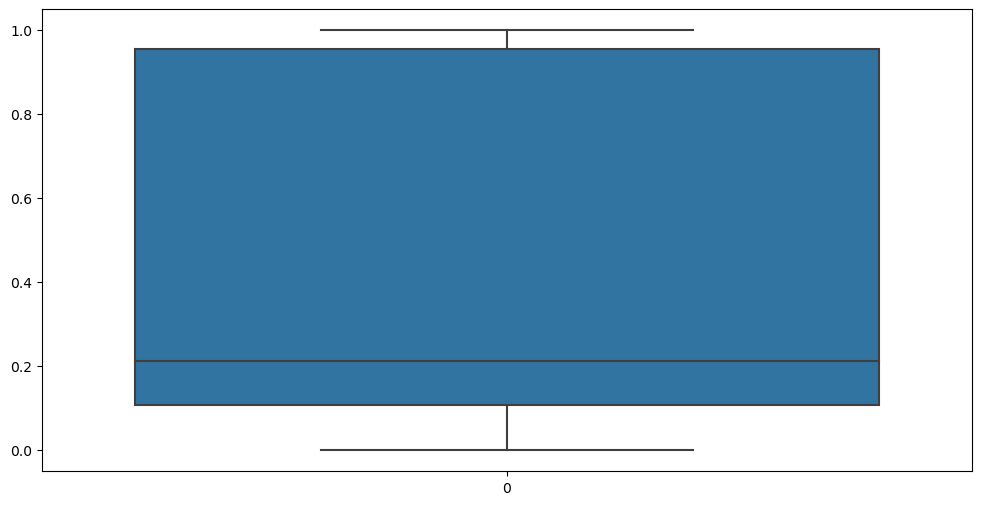

In [88]:
def zip_hist(df):
    import matplotlib
    import numpy as np
    import matplotlib.pyplot as plt
    plt.rcParams.update({'figure.max_open_warning': 0}) 
    fig = plt.figure(figsize=(12,6))
    fig.clf()
    # sns.boxplot(.to_numpy(), bins = 30)
    sns.boxplot(df["zipcode"])
    # plt.set_title('Histogram of ' + "zipcode" + '\n for readmitted patients')
    # fig.savefig('hist_' + "zipcode" + '.png')
    # plt.xticks(rotation=90)
zip_hist(df)

## traitement de longitude

In [89]:
# df["longitude"] = df['longitude'] - df['longitude'].min()

# 7 - Visualisation

In [90]:
# def satisfaction_bar(df):   
#     import matplotlib
#     import numpy as np
#     import matplotlib.pyplot as plt
#     plt.rcParams.update({'figure.max_open_warning': 0})
    
#     # names = df.columns.tolist()
#     selected_names= ['property_type','room_type','bed_type','cancellation_policy','cleaning_fee','city',
#                     'first_review','host_has_profile_pic','host_identity_verified','host_response_rate',
#                     'host_since','instant_bookable','last_review','zipcode']
#     for col in selected_names:
#         if(df[col].dtype not in [np.int64, np.int32, np.float64]):
#             temp1 = df.loc[df.review_scores_rating == 1, col].value_counts()
#             temp0 = df.loc[df.review_scores_rating == 0, col].value_counts() 
#             fig = plt.figure(figsize=(8,4))
#             fig.clf()
#             ax1 = fig.add_subplot(1, 2, 1)
#             ax0 = fig.add_subplot(1, 2, 2) 
#             temp1.plot(kind = 'bar', ax = ax1)
#             ax1.set_title('Values of ' + col + '\n for satisfied clients')
#             temp0.plot(kind = 'bar', ax = ax0)
#             ax0.set_title('Values of ' + col + '\n for not satisfied clients')
#             # fig.savefig('bar_' + col + '.png')
#             print(col)
    
            
#     return 'Done'
# satisfaction_bar(df)

In [91]:

# def satisfaction_box(df):
#     import matplotlib
#     import numpy as np
#     import matplotlib.pyplot as plt
#     plt.rcParams.update({'figure.max_open_warning': 0})
    
#     names = df.columns.tolist()
#     for col in names:
#         if(df[col].dtype in [np.int64, np.int32, np.float64]):
#             temp1 = df.loc[df.review_scores_rating == 1, col]
#             temp0 = df.loc[df.review_scores_rating == 0, col]  
             
#             fig = plt.figure(figsize=(8,4))
#             fig.clf()
#             ax1 = fig.add_subplot(1, 2, 1)
#             ax0 = fig.add_subplot(1, 2, 2) 
#             ax1.boxplot(temp1.to_numpy())
#             ax1.set_title('Box plot of ' + col + '\n for satisfied clients')
#             ax0.boxplot(temp0.to_numpy())
#             ax0.set_title('Box plot of ' + col + '\n for not satisfied clients')
#             fig.savefig('box_' + col + '.png')

#     return 'Done'
    
# satisfaction_box(df)

In [92]:
# def satisfaction_hist(df):
#     import matplotlib
#     import numpy as np
#     import matplotlib.pyplot as plt
#     plt.rcParams.update({'figure.max_open_warning': 0})
    
#     names = df.columns.tolist()
#     for col in names:
#         if(df[col].dtype in [np.int64, np.int32, np.float64]):
#             temp1 = df.loc[df.review_scores_rating == 1, col]
#             temp0 = df.loc[df.review_scores_rating == 0, col]  
             
#             fig = plt.figure(figsize=(8,4))
#             fig.clf()
#             ax1 = fig.add_subplot(1, 2, 1)
#             ax0 = fig.add_subplot(1, 2, 2) 
#             ax1.hist(temp1.to_numpy(), bins = 30)
#             ax1.set_title('Histogram of ' + col + '\n for readmitted patients')
#             ax0.hist(temp0.to_numpy(), bins = 30)
#             ax0.set_title('Histogram of ' + col + '\n for patients not readmitted')
#             fig.savefig('hist_' + col + '.png')

#     return 'Done'

# satisfaction_hist(df)

# 8 - Traitement de catégories 

In [93]:
df.host_has_profile_pic.unique()

array(['t', 'f'], dtype=object)

In [94]:
# df.zipcode = df.zipcode.astype(float)
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

def codage_categorie(data):
    for column_name in data.columns:
        if data[column_name].dtype == object and column_name != "host_since" and column_name != "last_review" and column_name != "first_review" :
            data_encoded = pd.get_dummies(data[column_name], prefix=column_name).astype(float)
            data = pd.concat([data, data_encoded], axis=1)
            data.drop([column_name],axis=1,inplace=True)
        elif column_name == "host_since" or column_name == "last_review" or column_name == "first_review" :
            data[column_name] = pd.to_datetime(data[column_name])
            # data[column_name] = (data[column_name] - data[column_name].min()) / (data[column_name].max() - data[column_name].min())
            data[column_name] = MinMaxScaler().fit_transform(data[[column_name]])
            data.drop([column_name],axis=1,inplace=True)
        else:
            pass
    return data

df = codage_categorie(df)


In [95]:
# df.property_type_Apartment.dtypes
df.columns.size

665

In [96]:
# plt.figure(figsize = (40,40))
# sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
# plt.show()
# print(df.Apartment)

# 9 - target / features

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
y = df['log_price']
x = df.drop('log_price', axis=1)

# 9 - Feature Selection

## Seuil d'écart (Variance Threshold)

In [99]:
from sklearn.feature_selection import VarianceThreshold

In [100]:
selector = VarianceThreshold(threshold=0.2)
selector.fit(x)

VarianceThreshold(threshold=0.2)

In [101]:
np.array(x.columns)[selector.get_support()]
data = df[np.array(x.columns)[selector.get_support()]]
data.columns

Index(['id', 'accommodates', 'bathrooms', 'host_response_rate',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'property_type_Apartment', 'room_type_Entire home/apt',
       'room_type_Private room', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'city_LA', 'city_NYC'],
      dtype='object')

In [102]:
print(np.array(x.columns)[selector.get_support()].size)
# chi2 , select from model

15


## SelectKBest

In [103]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [104]:
# chi2(x,y)

In [105]:
selector2 = SelectKBest(f_classif, k=17)
selector2.fit(x, y)
np.array(x.columns)[selector2.get_support()]

array(['accommodates', 'bathrooms', 'bedrooms', 'beds',
       'property_type_Hostel', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_super_strict_60',
       'neighbourhood_Chevy Chase, MD', 'neighbourhood_Gateway',
       'neighbourhood_Malibu', 'neighbourhood_Noho',
       'neighbourhood_Observatory Circle', 'neighbourhood_Queens',
       'neighbourhood_Shepherd Park', 'neighbourhood_South Chicago'],
      dtype=object)

# 9 - training the model(Ridge)

In [106]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.2)
x= data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

In [107]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.2)

In [108]:
y_pred = ridge.predict(x_test)

In [109]:
y_pred

array([5.33028401, 5.21620415, 5.12092736, ..., 4.90078927, 4.75355939,
       5.07303591])

In [110]:
print("Slop: %.2f" % ridge.coef_[0])

Slop: -0.00


In [111]:
print("Intercept: %.2f" % ridge.intercept_)

Intercept: 2.96


In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true and y_pred are your true labels and predicted labels, respectively, for a regression problem
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.3355968588040601
Mean Squared Error (MSE): 0.18726417874467657
Root Mean Squared Error (RMSE): 0.43274031328809265
R-squared (R²) Score: 0.5777164892032638


# 9 - training the model(linear model)

In [113]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [114]:
reg.score(x_test,y_test)
y_pred2 = reg.predict(x_test)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true and y_pred are your true labels and predicted labels, respectively, for a regression problem
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = mean_squared_error(y_test, y_pred2, squared=False)
r2 = r2_score(y_test, y_pred2)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.3355971553292054
Mean Squared Error (MSE): 0.18726464957882347
Root Mean Squared Error (RMSE): 0.43274085730240847
R-squared (R²) Score: 0.5777154274652534


# 9 - training the model(SVR)

## Feature scaling


In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)
x_train.shape

(34432, 15)

In [117]:
# from sklearn.svm import SVR

# svr_lin = SVR(kernel = 'linear')
# # svr_rbf = SVR(kernel = 'rbf')
# # svr_poly = SVR(kernel = 'poly')

# svr_lin.fit(X_train_scaled, y_train)
# # svr_rbf.fit(X_train_scaled, y_train)
# # svr_poly.fit(X_train_scaled, y_train)

In [118]:
# import numpy as np
# from sklearn import metrics

# #### Test dataset - metrics ####
# y_test_pred = svr_lin.predict(X_test_scaled)
# r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
# rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
# print(f'r2: {r2_score}')
# print(f'rmse: {rmse}')

# 9 - training the model

# 10 - Learning curve

In [119]:
from sklearn.model_selection import learning_curve

[ 3012  4439  5867  7294  8721 10148 11575 13002 14429 15856 17283 18711
 20138 21565 22992 24419 25846 27273 28700 30128]


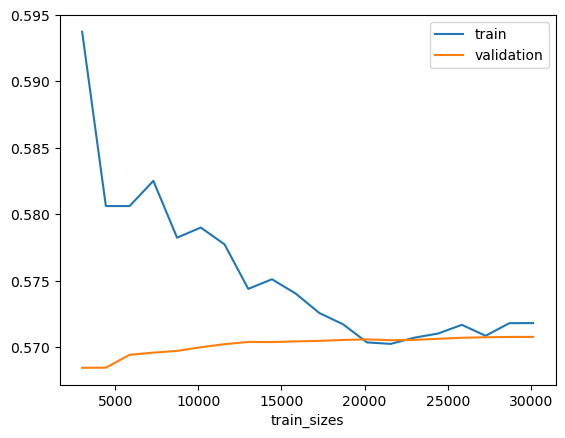

In [122]:
N, train_score, val_score = learning_curve(reg, x_train, y_train,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=8)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [129]:
N, train_score, val_score = learning_curve(reg, x_train, y_train,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=8)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2761777481.py, line 4)

[ 3012  4439  5867  7294  8721 10148 11575 13002 14429 15856 17283 18711
 20138 21565 22992 24419 25846 27273 28700 30128]


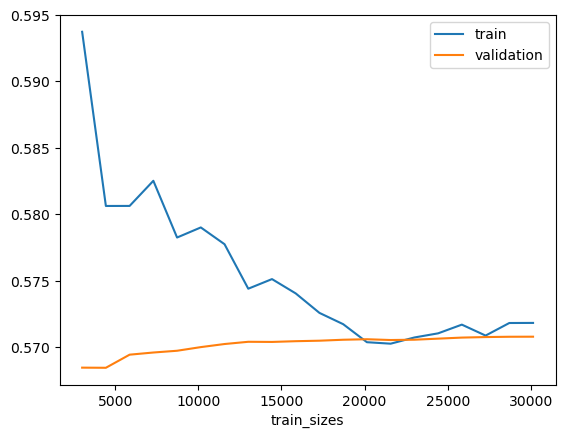

In [123]:
N, train_score, val_score = learning_curve(ridge, x_train, y_train,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=8)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [121]:
print(df.review_scores_rating)

0        100.0
1         93.0
2         92.0
4         40.0
5        100.0
         ...  
74104    100.0
74105     91.0
74107     93.0
74108     94.0
74110     96.0
Name: review_scores_rating, Length: 57388, dtype: float64
